# Project: Investigate a Dataset (No-Show Appointment)
### Done For Udacity Data Analysis Nanodegree Program
### By: Isra Bazzar 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>

</ul>



<a id='intro'></a>
## Introduction


### Data Description
#### No-show appointments 
> This information about Data provided by Udacity project google document for Data set suggestions, Copied here for reference.

(original source on [Kaggle](https://www.google.com/url?q=https://www.kaggle.com/joniarroba/noshowappointments&sa=D&ust=1561218940583000) )

*This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.*

*‘ScheduledDay’ tells us on what day the patient set up their appointment.
<br/>‘Neighborhood’ indicates the location of the hospital.
<br/>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
<br/>Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
<br/>
<b>Suggested Question</b>
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?*

In the next Cell I will do more investigation about Data to discover what questions can be asked about the Data and what conclusions can be made.


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

#Data file uploaded to our environment, I changed the name to noshowappointment.csv for easiness
df = pd.read_csv('noshowappointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Questions:
1. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
> Percentage of show-up will be implemented versus many features(mainly the booleans) to see if there is a significant effect of any feature can be concluded <br/> - General Features: [Gender](#gender), [Scholarship](#scholar), [Neighbourhood](#neighbour), [SMS_received](#sms)<br/> - Type Of Disease: [Diabets](#diabetes), [Hypertension](#hyper), [Alcoholism](#alcohol), [Type of Handicap](#handicap)

2. Is there any relation between [age group(may be decade)](#age) and the percentage of show-up?
> Grouping by (Age) then implementing vs. the percentage of show-up

3. Does the [day of the week](#dayweek) for appointment affect the showness
> Feature to be investigated: [AppointmentDay]  

4. Does the time interval between scheduling and appointment day affect the percentage of show-up?
> [daysInterval](#daysinterval) = ScheduledDay - AppointmentDay


<a id='wrangling'></a>
## Data Wrangling

In this section I will view data and check what cleaning and trimming are needed for easier and clearer exploration and analysis.

### Assessing Data
General Data Exploration
1. Number of rows and columns
2. Column names and types and ideas about possible fixes
3. Count of Non-null values for each feature
4. Number of duplicated rows 
5. Ideas for cleaner Data 

In [2]:
# Number of rows and columns
print("(Rows, Columns)")
print(df.shape)

# Find Number of duplicated rows
print("\nNumber of duplicated Rows:", sum(df.duplicated()), "\n")

#Information about data columns (Number of non-null values and datatypes)
print("\nData Set Information:")
print(df.info())


(Rows, Columns)
(110527, 14)

Number of duplicated Rows: 0 


Data Set Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


In [3]:
#Get Indices for Columns 
print("\nColumn Names with Indices:")
for i, v in enumerate (df.columns):
    print(i, v)
    


Column Names with Indices:
0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [4]:
#Unique Values For Each Column
print("\n# Of Unique Values For Each Column:")
for col in df.columns:
    n = df[col].nunique()
    
    #print the unique values if nunique is less than 10
    if(n<=10):
        print(col, n, df[col].unique())
    else:
        print(col, n)


# Of Unique Values For Each Column:
PatientId 62299
AppointmentID 110527
Gender 2 ['F' 'M']
ScheduledDay 103549
AppointmentDay 27
Age 104
Neighbourhood 81
Scholarship 2 [0 1]
Hipertension 2 [1 0]
Diabetes 2 [0 1]
Alcoholism 2 [0 1]
Handcap 5 [0 1 2 3 4]
SMS_received 2 [0 1]
No-show 2 ['No' 'Yes']


### Columns Summary

There is 14 columns in our Dataset, Described in the table below:
<br/>

| Index | Column Name | Data Type | #Of Unique Values | Notes |
|---	|---	|---	|---	|---	|
|  0	| PatientId	| float64 	| 62299	| # of unique values < #of rows which means there some patients have many appointments |
|  1	| AppointmentID 	| int64 	| 110527 | Change column name to AppointmentId to consist with (PatientId)|
|  2	| Gender 	| object 	| 2:[F,M]	|  	|
|  3	| ScheduledDay 	| object 	| 103549 	| Change type to DateTime 	|
|  4	| AppointmentDay 	| object 	|  27	| Change type to int64 > take only Day since the month is the same for all appointments > known(May 2016)	|
|  5	| Age 	| int64 	| 104 	| Fix wrong values(minus) then group by age decade 	|
|  6	| Neighbourhood 	| object 	| 81 	| 	|
|  7	| Scholarship	| int64 	| 2: [0, 1]	|	|
|  8	| Hipertension 	| int64 	| 2: [1, 0]	| Fix Column name Typo > Hypertension	|
|  9	| Diabetes 	| int64 	| 2: [0, 1]	|  	|
|  10	| Alcoholism 	| int64 	| 2: [0, 1]	|  	|
|  11	| Handcap 	| int64 	| 5: [0, 1, 2, 3, 4]	| Fix Column name Typo > Handicap 	|
|  12	| SMS_received 	| int64 	| 2: [0, 1]	|  |
|  13	| No-show 	| object 	| 2: ['No' 'Yes']	| Change column name to No_show, Change data type to int64 > No: 0 , Yes: 1|



### Data Cleaning 

Now before we explore our Data to make conclusions, we will make some clean up and rearrangments so the exploration will be easier and clearer 

#### Fix Columns Names and Types
_Please read comments included in the code cell (preceeded by # sign) to know more about each code line and it's purpose_

In [5]:
#Change columns names
#1- Fixing Typos 
#2- Normalizing Naming Convention: No-show > No_show, AppointmentID> AppointmentId 
df.rename(columns = {'Hipertension': 'Hypertension',
                     'Handcap': 'Handicap',
                     'No-show':'No_show',
                     'AppointmentID': 'AppointmentId'}, inplace = True)

# Print columns headers to confirm changes
df.columns
 

Index(['PatientId', 'AppointmentId', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

#### Edit Age Data

1- Delete rows with minus Age value (Invalid Value)

2- Change Data for Age column to Age_Group, I would create new column with Age_Group Data but to minimize data no need for Age Data after grouping so I will replace it by groups, No need to change the type(int64), make 10 groups by decades as follows:  0-10 > 0, 11-20 > 1, 21-30 > 2, 31-40 > 3, 41-50 > 4, 51-60 > 5, 61-70 > 6, 71-80 > 7, 81-90 > 8, 90 and more > 9 , To do this grouping the easy way I will divide by 10 the floor cast of result will give the group number(decade number: # of tens ), then change type to int.
<br/> Get rid of outliers:Change the numbers >= 10 to group 9 to get rid of outliers (ages >= 100)

In [6]:
# Locate rows with Age = -1 to drop 
df.loc[df['Age'] == -1]
       

,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
#Drop the only row with Age = -1, get the row index from the cell above
df.drop([99832], inplace=True)

# First lets take a look on age values in our data frame
# Print Age data before edit
print("Age data before grouping\n", df["Age"].unique())
  
df["Age"] = np.floor(df["Age"]/10)
df = df.astype({"Age": int})


Age data before grouping
 [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]


In [8]:
# Get rid of outliers, Change numbers >= 10 to 9 
df["Age"].replace({10: 9, 11: 9}, inplace = True)

#Change the column name to AgeGroup to be more meaningful
df.rename(columns = {'Age': 'AgeGroup'}, inplace = True)

#Print Age unique values after grouping
print("Age unique values after grouping\n", df["AgeGroup"].unique())

#Print column names and type to confirm the change
df.dtypes

Age unique values after grouping
 [6 5 0 7 2 3 1 4 8 9]


PatientId         float64
AppointmentId       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
AgeGroup            int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No_show            object
dtype: object

#### Change No_show values to 1 and 0, and change type to int
I need this change so I can take advantage of function mean() to get percentage 

In [9]:
#Replace no-show No with 0 and 1 with 0 so we can take the mean value
df['No_show'].replace({'No': 0, 'Yes': 1}, inplace = True)

df = df.astype({"No_show": int})

#Print No_show unique values to confirm change
print(df['No_show'].unique())

[0 1]


### Fix Date Columns(ScheduledDay, AppointmentDay)
##### Change Type to datetime 

In [10]:
# print first 5 rows with ScheduleDay and AppointmentDay 
#to see the data format before edit
df[['AppointmentDay','ScheduledDay']].head()

,AppointmentDay,ScheduledDay
0,2016-04-29T00:00:00Z,2016-04-29T18:38:08Z
1,2016-04-29T00:00:00Z,2016-04-29T16:08:27Z
2,2016-04-29T00:00:00Z,2016-04-29T16:19:04Z
3,2016-04-29T00:00:00Z,2016-04-29T17:29:31Z
4,2016-04-29T00:00:00Z,2016-04-29T16:07:23Z


In [11]:
#Change data type to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [12]:
# Print date frame head(first 5 rows) to check the new formats
df[['AppointmentDay','ScheduledDay']].head()

,AppointmentDay,ScheduledDay
0,2016-04-29,2016-04-29 18:38:08
1,2016-04-29,2016-04-29 16:08:27
2,2016-04-29,2016-04-29 16:19:04
3,2016-04-29,2016-04-29 17:29:31
4,2016-04-29,2016-04-29 16:07:23


#### Add new column "dayOfWeek"
Which represents the day of week for each appointment date

In [13]:
#Find day of week for each appointmentDay entry
df['dayOfWeek']= df['AppointmentDay'].dt.day_name()

# Print the new column dayOfColumn to confirm results
df['dayOfWeek'].unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'], dtype=object)

#### Add new column "daysInterval"
Which represents how many days are between the scheduled day and appointment day

In [14]:
#Calculate how many days between scheduled and appointment day
# Used absolute function: abs() to remove minus values if any 
df['daysInterval'] = ((df['AppointmentDay'] - df['ScheduledDay']).dt.days).abs()

df['daysInterval'].unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122])

<a id='eda'></a>
## Exploratory Data Analysis

 Now after cleaning and trimming data, we're ready to move on to exploration. 
 
 ### Calculate percentage of show-up for all patients

In [15]:
# No_show = 0 for patient show up, No_show = 1 for patient miss the appointment 
# Proportion for missed appointments
p_miss = df["No_show"].mean()
p_show = 1 - p_miss
 
print("Percentage of aapointments missed during May 2016 For all patients:", round(p_miss * 100 , 4) , "%")

Percentage of aapointments missed during May 2016 For all patients: 20.1934 %


#### Pie plot to compare percentage for missed appointments vs. show-up

No_show
0    88207
1    22319
Name: PatientId, dtype: int64
1: Missed Appointments, 0: Show-up Appointments


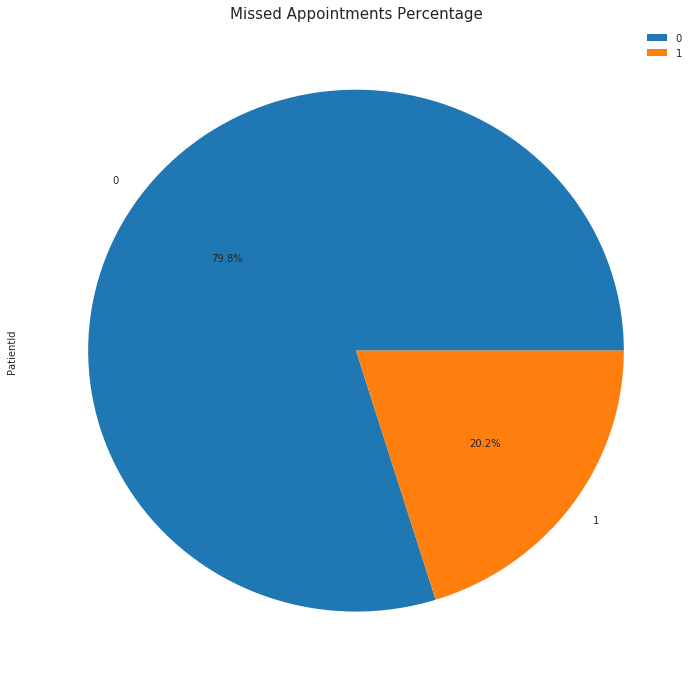

In [16]:
patient_group = df.groupby('No_show')['PatientId'].count()
print(patient_group)
pieChart = patient_group.plot.pie(figsize=(12, 12), autopct ="%1.1f%%");
pieChart.set_title("Missed Appointments Percentage", fontsize = 15);
print("1: Missed Appointments, 0: Show-up Appointments")
plt.legend();


### Research question 1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Percentage of show-up will be implemented versus many features(mainly the booleans) to see if there is a significant effect of any feature can be concluded
- General Features: [Gender](#gender), [Scholarship](#scholar), [Neighbourhood](#neighbour), [SMS_received](#sms)

<a id='gender'></a>
#### Gender vs. Propotion(Missed)

Gender
F    0.203149
M    0.199679
Name: No_show, dtype: float64


Text(0,0.5,'Missing appointment proportion')

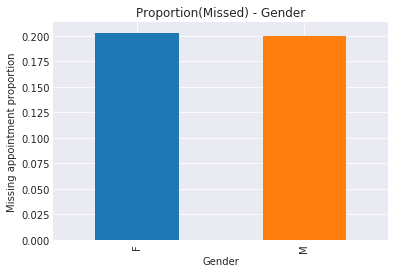

In [17]:
# Gender: 
gender_groups = df.groupby('Gender')['No_show'].mean()
print(gender_groups)

gender_groups.plot(kind='bar', title='Proportion(Missed) - Gender');
plt.xlabel('Gender')
plt.ylabel('Missing appointment proportion')


<a id='scholar'></a>
#### Scholarship vs. proportion(missed)

Scholarship
0    0.198074
1    0.237363
Name: No_show, dtype: float64


Text(0,0.5,'Missing appointment proportion')

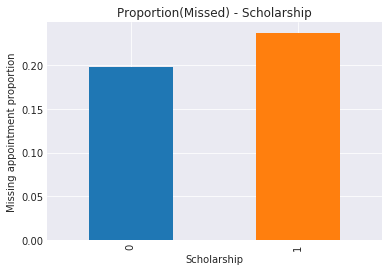

In [18]:
#Scholarship
scholar_groups = df.groupby('Scholarship')['No_show'].mean()
print(scholar_groups)

scholar_groups.plot(kind='bar', title='Proportion(Missed) - Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Missing appointment proportion')



<a id='sms'></a>
#### SMS_received vs. proportion(missed)

SMS_received
0    0.167035
1    0.275745
Name: No_show, dtype: float64


Text(0,0.5,'Missing appointment proportion')

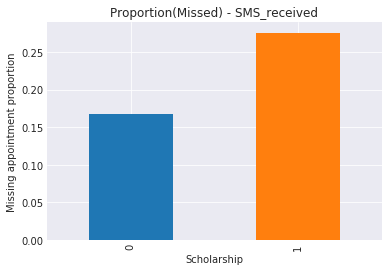

In [19]:
#SMS_receieved
sms_groups = df.groupby('SMS_received')['No_show'].mean()
print(sms_groups)

sms_groups.plot(kind='bar', title='Proportion(Missed) - SMS_received')
plt.xlabel('Scholarship')
plt.ylabel('Missing appointment proportion')

<a id='c1'></a>
#### Conclusion 1.1
About which feature could affect the proportion of missing appointment(p_miss):<br/>

1- Gender: We can conclude that there is no relation since the proportion of missed appointments for both males and females are almost equals

2- Scholarship: p_miss for value 1 (patient has a scholarship) is higher than others.

3- SMS_received: p_miss for patients who has a message is surprisingly higher than  p_miss for those who don't, *(Hypothesis(Not proved yet): Sending message doesn't help!, Note: This is just a thought NOT a conclusion)*


<a id='neighbour'></a>
#### neighbourhood_groups vs. proportion(missed)

In [20]:
#neighbourhood investigation
neighbourhood_groups = df.groupby('Neighbourhood')['No_show'].mean()
print(neighbourhood_groups)


Neighbourhood
AEROPORTO              0.125000
ANDORINHAS             0.230327
ANTÔNIO HONÓRIO        0.184502
ARIOVALDO FAVALESSA    0.219858
BARRO VERMELHO         0.215130
BELA VISTA             0.201363
BENTO FERREIRA         0.224942
BOA VISTA              0.185897
BONFIM                 0.198341
CARATOÍRA              0.230409
CENTRO                 0.210858
COMDUSA                0.180645
CONQUISTA              0.188457
CONSOLAÇÃO             0.172238
CRUZAMENTO             0.217454
DA PENHA               0.193505
DE LOURDES             0.154098
DO CABRAL              0.157143
DO MOSCOSO             0.222760
DO QUADRO              0.164900
ENSEADA DO SUÁ         0.221277
ESTRELINHA             0.197026
FONTE GRANDE           0.218475
FORTE SÃO JOÃO         0.183166
FRADINHOS              0.186047
GOIABEIRAS             0.195714
GRANDE VITÓRIA         0.202614
GURIGICA               0.225966
HORTO                  0.240000
ILHA DAS CAIEIRAS      0.219421
                         .

Text(0,0.5,'Missing appointment proportion')

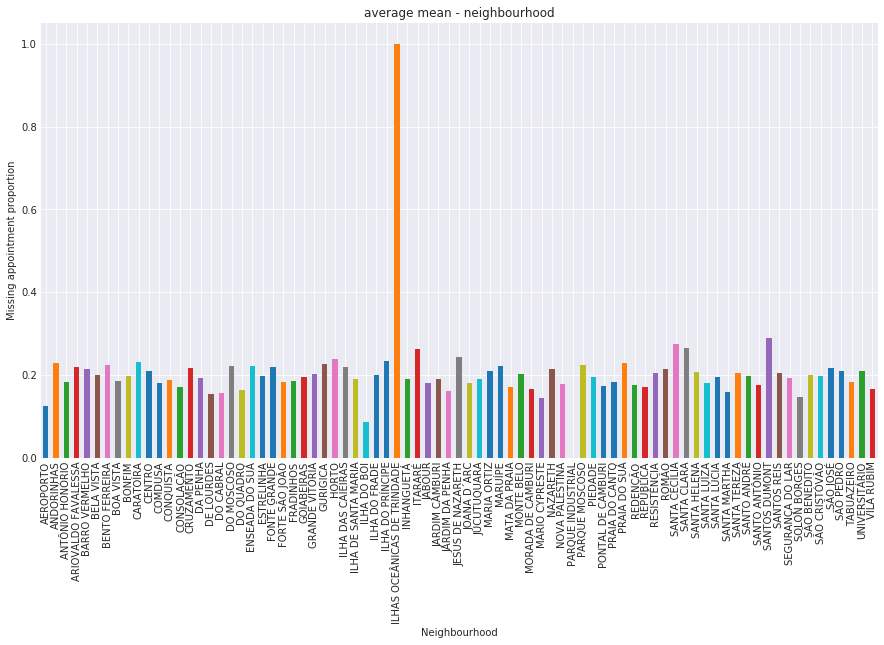

In [21]:
neighbourhood_groups.plot(kind='bar', title='average mean - neighbourhood', figsize=(15,8))
plt.xlabel('Neighbourhood')
plt.ylabel('Missing appointment proportion')

#### Conclusion 1.2: Neigbourhood
Looking at the plot we notice that almost all the proportions between 0.12 and 0.25, which is in my opinion is not meaningful, but their is surely something suspecious about proportion for 'ILHAS OCEANICAS DE TRINADADE' hospital, where the proprtion is 1, in other words: ALL Appointments have been missed, Let's do more investigation about this. In the next cell.

In [22]:
df[df['Neighbourhood'].str.startswith('ILHAS')]


,PatientId,AppointmentId,Gender,ScheduledDay,AppointmentDay,AgeGroup,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,dayOfWeek,daysInterval
48754,5.349869e+11,5583947,F,2016-04-14 12:25:43,2016-05-13,5,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,Friday,28
48765,7.256430e+12,5583948,F,2016-04-14 12:26:13,2016-05-13,5,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,1,Friday,28


From these results, note that we have only 2 appointments in this neighbourhood , and since other neighbourhoods have almost the same proportin, So in my opinion this (proprtion of 1) is not significant for us to make conclusions about the probabilties related to neighbourhood

### Research Question 1.2
- Type Of Disease: [Diabets](#diabetes), [Hypertension](#hyper), [Alcoholism](#alcohol), [Type of Handicap](#handicap)

<a id='diabetes'></a>
#### Diabetes vs. proportion(missed)

Diabetes
0    0.203630
1    0.180033
Name: No_show, dtype: float64


Text(0,0.5,'Missing appointment proportion')

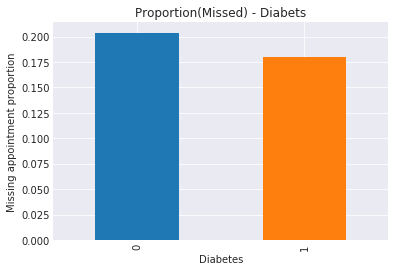

In [23]:
# Diabetes: 
diabetes_groups = df.groupby('Diabetes')['No_show'].mean()
print(diabetes_groups)

diabetes_groups.plot(kind='bar', title='Proportion(Missed) - Diabets');
plt.xlabel('Diabetes')
plt.ylabel('Missing appointment proportion')


<a id='hyper'></a>
#### Hypertension vs. proportion(missed)

Hypertension
0    0.209039
1    0.173020
Name: No_show, dtype: float64


Text(0,0.5,'Missing appointment proportion')

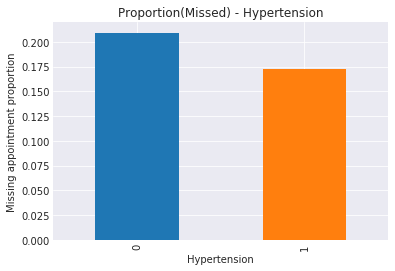

In [24]:
# Hypertension: 
hypertension_groups = df.groupby('Hypertension')['No_show'].mean()
print(hypertension_groups)

hypertension_groups.plot(kind='bar', title='Proportion(Missed) - Hypertension');
plt.xlabel('Hypertension')
plt.ylabel('Missing appointment proportion')


<a id='alcohol'></a>
#### Alcoholism vs. proportion(missed)

Alcoholism
0    0.201948
1    0.201488
Name: No_show, dtype: float64


Text(0,0.5,'Missing appointment proportion')

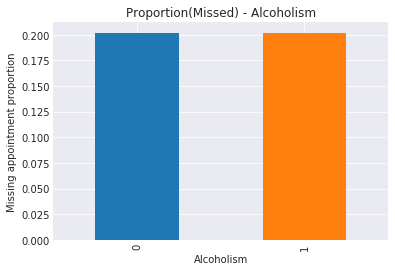

In [25]:
# Alcoholism: 
alcoholism_groups = df.groupby('Alcoholism')['No_show'].mean()
print(alcoholism_groups)

alcoholism_groups.plot(kind='bar', title='Proportion(Missed) - Alcoholism');
plt.xlabel('Alcoholism')
plt.ylabel('Missing appointment proportion')


<a id='handicap'></a>
#### Handicap Type vs. proportion(missed)

Handicap
0    0.202355
1    0.179236
2    0.202186
3    0.230769
4    0.333333
Name: No_show, dtype: float64


Text(0,0.5,'Missing appointment proportion')

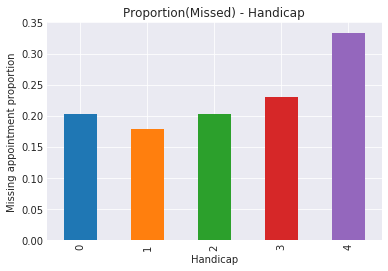

In [26]:
# handicap: 
handicap_groups = df.groupby('Handicap')['No_show'].mean()
print(handicap_groups)

handicap_groups.plot(kind='bar', title='Proportion(Missed) - Handicap');
plt.xlabel('Handicap')
plt.ylabel('Missing appointment proportion')

#### Conclusion 1.3 (Disease) 
>For Diabetes, Hypertension and Alcoholism: differences between missed and show proportions is almost zero, concluding none of these diseases has an effect on missing appointment probability.
Handicap: From the plot we can see that patients with handicap of type 4 have the most proportion for missing appointments; while the other types have almost the same proportion.


<a id='age'></a>
### Research Question 2: Is there any relation between age group and the percentage of show-up?

#### Age Groups by decades vs. proportion of missing appointment

AgeGroup
0    0.199371
1    0.251778
2    0.246733
3    0.217520
4    0.202688
5    0.174998
6    0.150724
7    0.152005
8    0.157841
9    0.203837
Name: No_show, dtype: float64


Text(0,0.5,'Missing appointment proportion')

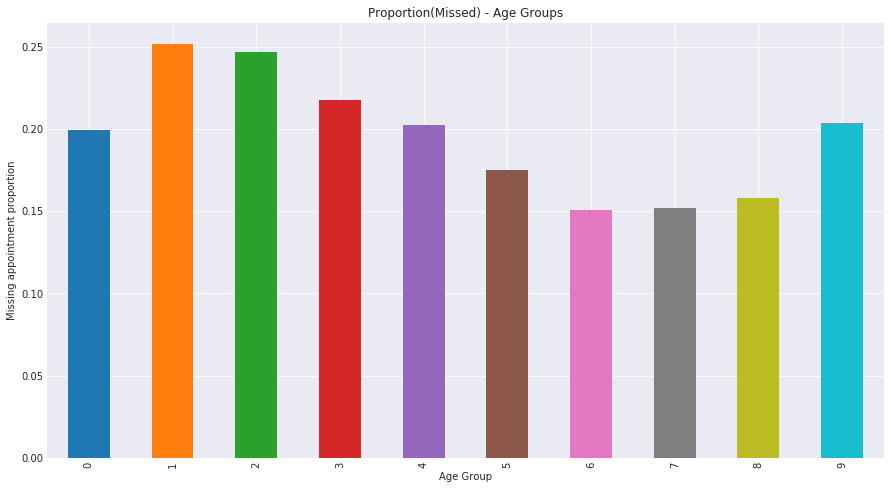

In [27]:
# Age Groups: 
age_groups = df.groupby('AgeGroup')['No_show'].mean()
print(age_groups)

age_groups.plot(kind='bar', title='Proportion(Missed) - Age Groups', figsize=(15, 8));
plt.xlabel('Age Group')
plt.ylabel('Missing appointment proportion')


<a id='c2'></a>
### Conclusion 2: Age Group
From results above, Histogram is almot left-sided, patients in sixties, seventies and eighties have less proportions than others who are younger, we can conclude: 
> Older patients have less proportions for missing appointments <br/> Young patienties(10 - 40) have more proportions for missing appointments *(May be they have busy lives and they think they still have time for health!! NOTE: This just a thought and NOT a conclusion, we CAN'T have this result from our data)* 

<a id='dayweek'></a>
### Research Question 3: Does the day of the week for appointment affect the showness

#### Day Of Week vs. Proportion(missed)


dayOfWeek
Friday       0.212261
Monday       0.206481
Saturday     0.230769
Thursday     0.193541
Tuesday      0.200936
Wednesday    0.196892
Name: No_show, dtype: float64


Text(0,0.5,'Missing appointment proportion')

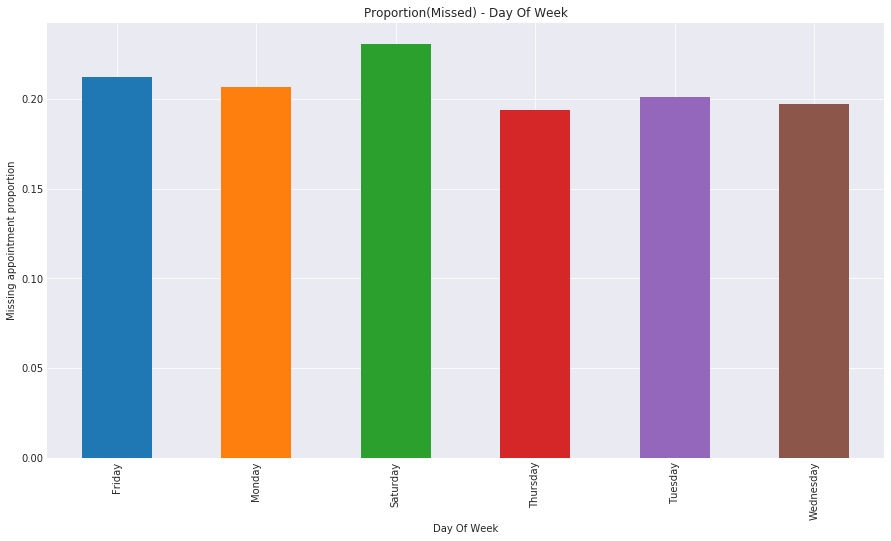

In [28]:
# Day of Week: 
dayOfWeek_groups = df.groupby('dayOfWeek')['No_show'].mean()
print(dayOfWeek_groups)

dayOfWeek_groups.plot(kind='bar', title='Proportion(Missed) - Day Of Week', figsize=(15, 8));
plt.xlabel('Day Of Week')
plt.ylabel('Missing appointment proportion')

<a id='daysinterval'></a>
### Research Question 4: Does the time interval between scheduling and appointment day affect the percentage of show-up?

#### Days between scheduling and appointment days

daysInterval
0      0.213505
1      0.074944
2      0.236410
3      0.232703
4      0.266097
5      0.247956
6      0.266816
7      0.287613
8      0.274143
9      0.316319
10     0.316109
11     0.316592
12     0.318668
13     0.313423
14     0.333999
15     0.304952
16     0.316170
17     0.305583
18     0.347701
19     0.343724
20     0.308974
21     0.344416
22     0.335766
23     0.377814
24     0.401884
25     0.359781
26     0.315893
27     0.294842
28     0.326905
29     0.265625
         ...   
100    0.000000
101    0.250000
102    0.600000
103    0.750000
104    0.000000
106    0.000000
107    0.000000
108    0.000000
109    0.500000
110    0.200000
111    0.000000
114    0.000000
116    0.000000
118    0.000000
121    0.000000
122    0.000000
124    0.000000
125    1.000000
126    0.000000
131    1.000000
132    0.363636
138    1.000000
141    0.375000
145    1.000000
150    1.000000
154    0.600000
161    0.181818
168    0.125000
175    0.375000
178    0.200000
Name: No_sh

Text(0,0.5,'Missing appointment proportion')

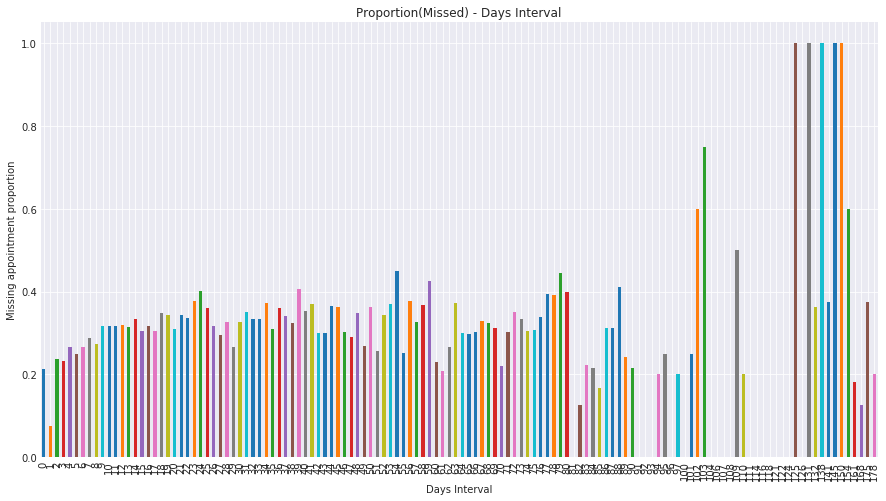

In [29]:
# Days Interval: 
daysInterval_groups = df.groupby('daysInterval')['No_show'].mean()
print(daysInterval_groups)

daysInterval_groups.plot(kind='bar', title='Proportion(Missed) - Days Interval', figsize=(15, 8));
plt.xlabel('Days Interval')
plt.ylabel('Missing appointment proportion')

Text(0,0.5,'Missing appointment proportion')

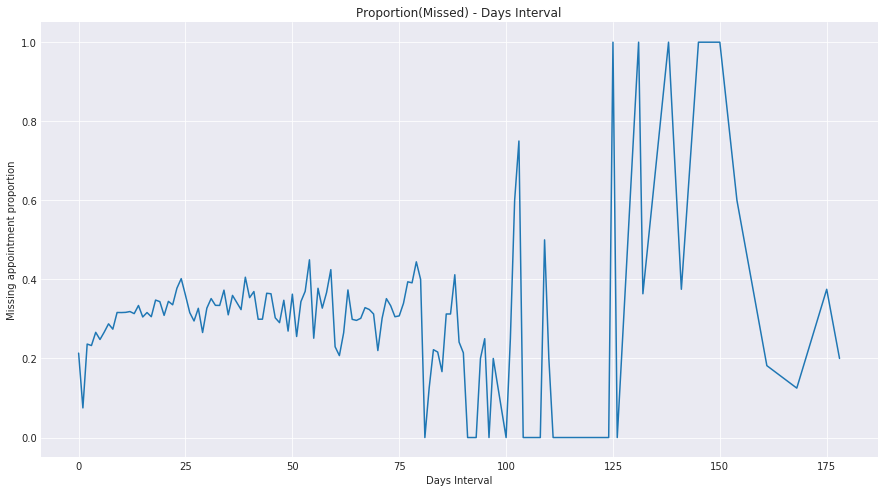

In [30]:
# Again Plot Relation between days interval between schedule day and appointment day 
#this time using line chart to spot type of this relation
# Days Interval: 
daysInterval_groups.plot(kind='line', title='Proportion(Missed) - Days Interval', figsize=(15, 8));
plt.xlabel('Days Interval')
plt.ylabel('Missing appointment proportion')


<a id='conclusion'></a>
## Conclusions

### Limitations
1- Many features data has been collected that can't be a predictor for this study (Probability of show-up per appointment), 
I think there are some features that can be more predictable like, maritual status and number of kids, whether the patient is employed, doctor speciality, and may be appointment reason (follow up, checkup or having disease to cure)

2- Through our data analysis here some data grouping result in small smaples that may increase the errornous in conclusions and predictions, This can be solved by doing the study for bigger data set may be for a year instead of one month will enable us to have more precise conclusions and predictions, Such as :<br/>
Neighbourhood: There 81 different neighbourhood with only (Name providedwith data type: Object), which makes it hard or even impossible to make groups, grouping here resulted in very small samples(some neighbourhood has only 2 entries from all 110527 entries) so the data seems like incionsistent, with this type of data, the comparison between neighbourhoods will be meaningless, I suggest to provide groups may be by city will give more predictable data 


<a id='c1'></a>
#### 1.1: Gender, Scholarship, SMS_recieved
> About which feature could affect the proportion of missing appointment(p_miss):<br/>
1- Gender: We can conclude that there is no relation since the proportion of missed appointments for both males and females are almost equals
2- Scholarship: p_miss for value 1 (patient has a scholarship) is higher than others.
3- SMS_received: p_miss for patients who has a message is surprisingly higher than  p_miss for those who don't, *(Hypothesis(Not proved): Sending message doesn't help!, Note: This is just a thought NOT a conclusion)*

#### 1.2: Neigbourhood
>Looking at the plot we notice that almost all the proportions between 0.12 and 0.25, more deeply digging needed here to make good conclusions, collecting region data in a different way will help much.


#### 1.3 (Disease) 
>For Diabetes, Hypertension and Alcoholism: differences between missed and show proportions is almost zero, concluding none of these diseases has an effect on missing appointment probability.
Handicap: From the plot we can see that patients with handicap of type 4 have the most proportion for missing appointments; while the other types have almost the same proportion.

### 2: Age Group
>From results above, Histogram is almot left-sided, patients in sixties, seventies and eighties have less proportions than others who are younger, we can conclude:

>Older patients have less proportions for missing appointments 
Young patienties(10 - 40) have more proportions for missing appointments (May be they have busy lives and they think they still have time for health!! NOTE: This just a thought and NOT a conclusion, we CAN'T have this result from our data)

### 3: Day of week
> Weekends(Friday and Saturday) have higher proportion of missing appointments 


### 4: Time between Schedule day and Appointment Day

> From results and plot above we can see that appointments with scheduled day before (more than 120 days) from appointment have almost 1 proportion (=100%) of missing appointments


In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0